# Hand-crafted features for graph ml

В этом ноутбуке познакомимся с библиотекой NetworkX, вычислим признаки для вершин, ребер и графов. Также попробуем реализовать графовое ядро.

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

Добавление вершин и атрибутов

In [3]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Get attributes of the node
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [4]:
for node in G.nodes(data=True):
    print(node)

num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


Добавление рёбер

In [5]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])

G_p = nx.path_graph(10)
G.add_edges_from(G_p.edges())

In [6]:
# access graph edges
G[1]

AtlasView({2: {}, 3: {}, 0: {}})

In [7]:
# set an attribute of an edge
G.add_edge(1,3)
G[1][3]['color'] = 'blue'


FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adjacency():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [8]:
# graph attribte
Gr = nx.Graph(day='Friday')
Gr.graph

{'day': 'Friday'}

In [9]:
# modifying an attribute
Gr.graph['day'] = 'Monday'
Gr.graph

{'day': 'Monday'}

## Признаки для вершин
Степень вершины и соседи

In [10]:
node_id = 1

# Degree of the node
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of the node
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 3
Node 1 has neighbor 2
Node 1 has neighbor 3
Node 1 has neighbor 0


In [11]:
# directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [12]:
DG.degree(1, weight='weight')

1.25

In [13]:
# convert to undirected graph
G1 = nx.Graph(G)

Визуализация графа

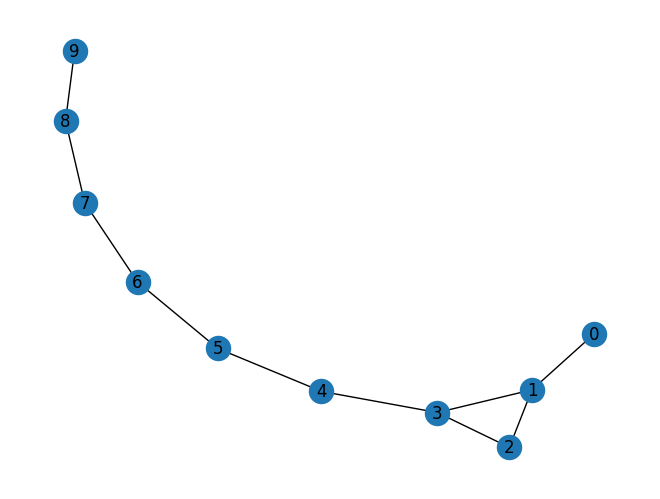

In [14]:
# basic graph drawing capability
nx.draw(G, with_labels=True)

Посмотрим на реальный граф [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

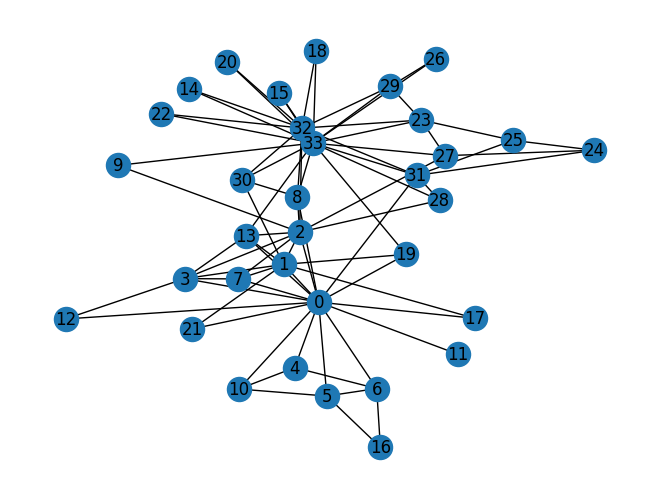

In [15]:
G = nx.karate_club_graph()

# Visualize the graph
nx.draw(G, with_labels = True)

In [16]:
# G is an undirected graph
type(G)

networkx.classes.graph.Graph

__Cредняя степень вершин__

In [17]:
def average_degree(num_edges, num_nodes):

    avg_degree = round(num_edges / num_nodes)

    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 2


__Average clustering coefficient__

In [18]:
def average_clustering_coefficient(G):

    avg_cluster_coef = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)

    return avg_cluster_coef, nx.algorithms.average_clustering(G)

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is (0.541, 0.5706384782076823)


__Сloseness centrality__

$c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [19]:
def closeness_centrality(G, node=5):

    closeness = nx.centrality.closeness_centrality(G, node)

    return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.38372093023255816


## Признаки для рёбер

__Jaccard coefficient__

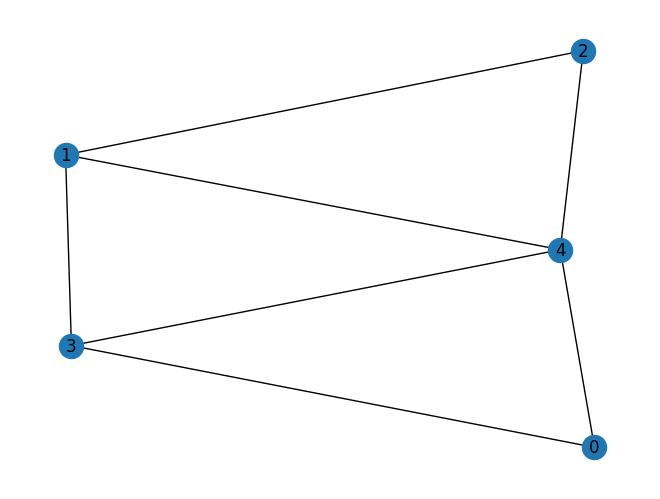

In [20]:
G = nx.complete_graph(5)
G.remove_edge(0, 1)
G.remove_edge(0, 2)
G.remove_edge(2, 3)
nx.draw(G, with_labels=True)

In [21]:
preds = nx.jaccard_coefficient(G, [(0, 3), (3, 4)])
for u, v, p in preds:
     print('(%d, %d) -> %.8f' % (u, v, p))

(0, 3) -> 0.25000000
(3, 4) -> 0.40000000


__Common neighbors__

In [22]:
sorted(nx.common_neighbors(G, 3, 4))

[0, 1]

In [23]:
preds = nx.common_neighbor_centrality(G, [(0, 3), (3, 4)])
for u, v, p in preds:
    print(f"({u}, {v}) -> {p}")

(0, 3) -> 1.7999999999999998
(3, 4) -> 2.5999999999999996


__Adamic-Adar index__

In [24]:
preds = nx.adamic_adar_index(G, [(0, 3), (3, 4)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(0, 3) -> 0.72134752
(3, 4) -> 2.35293427


## Перенос графа в PyTorch tensor

In [25]:
import torch

G = nx.karate_club_graph()

Преобразование списка рёбер в `torch.LongTensor`.

In [26]:
def graph_to_edge_list(G):

    edge_list = list(G.edges())

    return edge_list

def edge_list_to_tensor(edge_list):

    edge_index = torch.tensor(edge_list, dtype=torch.long).permute((1, 0))

    return edge_index

edge_list = graph_to_edge_list(G)
edge_index = edge_list_to_tensor(edge_list)
print("The edge_index tensor has shape {}".format(edge_index.shape))

The edge_index tensor has shape torch.Size([2, 78])


## Признаки для графов: Graphlet Kernel

### Посчитаем графлеты заданной длины

In [27]:
g = nx.Graph()
g.add_edge(1,2);g.add_edge(1,3)
g.add_edge(1,7);g.add_edge(2,4)
g.add_edge(3,4);g.add_edge(3,5)
g.add_edge(3,6);g.add_edge(4,5)
g.add_edge(5,6);g.add_edge(6,7)

import itertools

target = nx.Graph()
target.add_edge(1,2)
target.add_edge(2,3)

for sub_nodes in itertools.combinations(g.nodes(),len(target.nodes())):
    subg = g.subgraph(sub_nodes)
    if nx.is_connected(subg) and nx.is_isomorphic(subg, target):
        print(subg.edges())

[(1, 2), (1, 3)]
[(1, 2), (1, 7)]
[(1, 2), (2, 4)]
[(1, 3), (1, 7)]
[(1, 3), (3, 4)]
[(1, 3), (3, 5)]
[(1, 3), (3, 6)]
[(1, 7), (6, 7)]
[(2, 4), (3, 4)]
[(2, 4), (4, 5)]
[(3, 6), (6, 7)]
[(3, 4), (3, 6)]
[(5, 6), (6, 7)]
[(4, 5), (5, 6)]


### Теперь обучим модель SVC на Graphlet Kernel

In [28]:
import networkx as nx
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Датасет из графов, задача классификации. Задача научиться различать графы-циклы и графы-пути.

In [29]:
# Generate dataset of graphs
def create_dataset(size=100):
    graph_list = [nx.cycle_graph(i) for i in range(10, size//2 + 10)]
    graph_list.extend([nx.path_graph(i) for i in range(size//2 + 10, size + 10)])
    y = [0 if i < (size//2 + 10) else 1 for i in range(size)]

    return graph_list, y

In [30]:
graph_list, y = create_dataset(300)
train_graphs, test_graphs, y_train, y_test = train_test_split(graph_list, y, test_size=0.1, stratify=y)

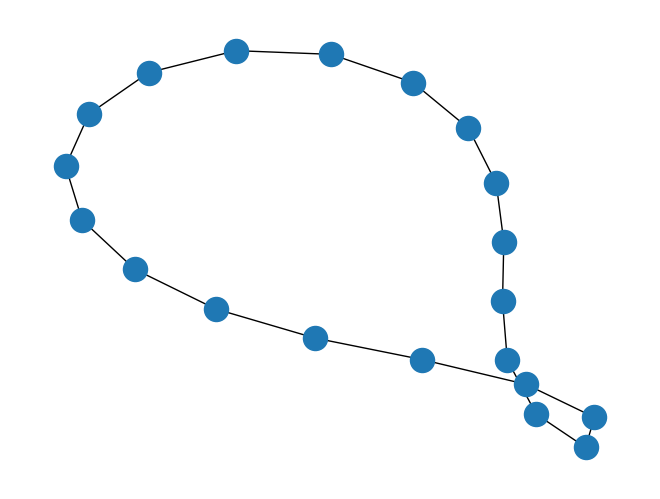

In [31]:
nx.draw(graph_list[10])

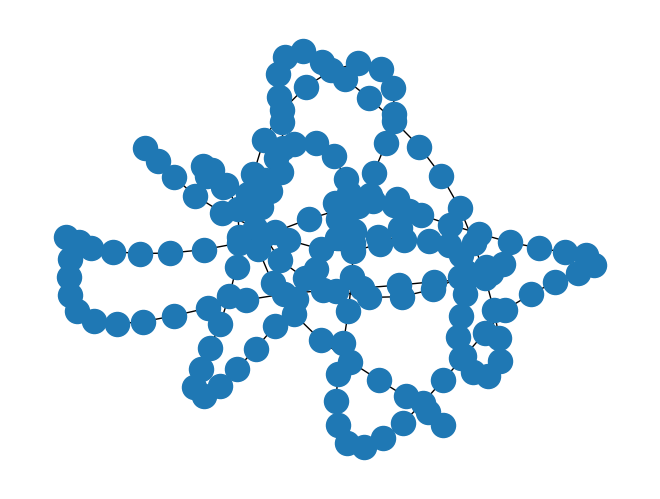

In [32]:
nx.draw(graph_list[160])

##Graphlet Kernel

In [33]:
# Compute the graphlet kernel
def graphlet_kernel(train_graphs, test_graphs, n_samples=100, seed=20):
    np.random.seed(seed)

    graphlets = [nx.Graph(), nx.Graph(), nx.Graph(), nx.Graph()]

    graphlets[0].add_nodes_from(range(3))

    graphlets[1].add_nodes_from(range(3))
    graphlets[1].add_edge(0, 1)

    graphlets[2].add_nodes_from(range(3))
    graphlets[2].add_edge(0, 1)
    graphlets[2].add_edge(1, 2)

    graphlets[3].add_nodes_from(range(3))
    graphlets[3].add_edge(0, 1)
    graphlets[3].add_edge(1, 2)
    graphlets[3].add_edge(0, 2)

    phi_train = np.zeros((len(train_graphs), 4))

    for i, graph in enumerate(train_graphs):
        for j in range(n_samples):
            rnd_set = np.random.choice(graph.nodes(), 3)
            sub_g = graph.subgraph(rnd_set)
            phi_train[i] += np.array([nx.is_isomorphic(g, sub_g) for g in graphlets])

    phi_test = np.zeros((len(test_graphs), 4))

    for i, graph in enumerate(test_graphs):
        for j in range(n_samples):
            rnd_set = np.random.choice(graph.nodes(), 3)
            sub_g = graph.subgraph(rnd_set)
            phi_test[i] += np.array([nx.is_isomorphic(g, sub_g) for g in graphlets])


    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test

In [34]:
K_train_gk, K_test_gk = graphlet_kernel(train_graphs, test_graphs, 500)

print(K_train_gk.shape, K_test_gk.shape)

(270, 270) (30, 270)


In [35]:
K_train_gk[0][1]

227785.0

In [36]:
K_train_gk[0][10]

225804.0

Обучение SVC

In [37]:
model = SVC(kernel='precomputed', random_state=42)
print("Starting Training for the Graphlet")
model.fit(K_train_gk, y_train)
y_pred = model.predict(K_test_gk)
print("Accuracy for Graphlet", accuracy_score(y_test, y_pred))

Starting Training for the Graphlet
Accuracy for Graphlet 0.9
